In [1]:
%cd ../

/home/users/dmoreno2016/VisionTransformers


In [2]:
import pandas as pd

from src.data.processing.create_images import *
from src.data.processing.get_data import get_dataset
from scripts.utils import load_yaml

In [14]:
name_dataset = 'elasticc_1'

path_data = 'data/lightcurves/elasticc_1'
dataset_config = load_yaml('configs/datasets_config.yaml')[name_dataset]
config = load_yaml('configs/online/run_config.yaml')['ft_classification']
config

{'results_dir': 'results',
 'exp_description': '',
 'model_name': 'swinv2',
 'checkpoint': {'use': False,
  'exp_name': 'ft_classification/elasticc_1/testing',
  'run_name': '2024-08-31_01-39-33',
  'results_dir': 'results'},
 'pretrained_model': {'use': True,
  'path': 'microsoft/swinv2-tiny-patch4-window16-256'},
 'list_folds': [0],
 'debug': False,
 'loader': {'path_data': 'data/lightcurves/elasticc_1',
  'spc': None,
  'num_workers': 15,
  'use_png': False},
 'training': {'lr': 5e-05,
  'patience': 10,
  'num_epochs': 10000,
  'batch_size': 64,
  'use_weighted_sampling': False,
  'monitor': 'f1/val',
  'cache_enabled': True,
  'classifier': {'use': True, 'only_train_classifier': False},
  'use_metadata': False},
 'imgs_params': {'norm_name': 'minmax_by_obj',
  'input_type': '6grid',
  'use_err': False,
  'fig_params': {'figsize': [2.56, 2.56],
   'fmt': '-o',
   'markersize': 2.0,
   'linewidth': 1.0,
   'colors': {0: '#00FF7F',
    1: '#7FFF00',
    2: '#FF007F',
    3: '#FF7F00',

In [6]:
partitions = pd.read_parquet(f'{path_data}/ATAT_partition/partitions_v1.parquet')
dataset = get_dataset(path_data, dataset_config, name_dataset, debug=True)

/home/users/dmoreno2016/VisionTransformers/src/data/processing/get_data.py:41: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[band_name] = df[band_name].replace(dataset_config['all_bands'])
/home/users/dmoreno2016/VisionTransformers/src/data/processing/get_data.py:41: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[band_name] = df[band_name].replace(dataset_config['all_bands'])


In [7]:
dataset

[              SNID         MJD    FLUXCAL  FLUXCALERR  BAND
 1         55162615  60275.0307  37.621403   12.546493     3
 2         21161797  60275.0822   0.634472    6.241648     3
 3         21161797  60275.0991  11.409507    8.415623     4
 4         69692785  60275.1120  28.230291   18.702690     4
 5         69692785  60275.1440  -8.457952   15.360238     5
 ...            ...         ...        ...         ...   ...
 12288024  49522972  61379.2866   0.330099    8.985371     0
 12288034  16004377  61379.2918  24.625963    3.126866     1
 12288036  41705039  61379.2923  85.104683    3.559689     1
 12288040  16767804  61379.2936  29.126663    3.341172     1
 12288062  49522972  61379.3032  19.520683    4.444035     1
 
 [1762000 rows x 5 columns],
              SNID         MJD      FLUXCAL  FLUXCALERR  BAND
 10       68572360  60275.2703   475.357086   12.076059     3
 14       68572360  60275.2928   559.145508   12.904810     4
 16       68572360  60275.3183   623.651184   37.15

In [8]:
dict_cols = dataset_config['dict_columns']
dict_cols

{'snid': 'SNID',
 'mjd': 'MJD',
 'flux': 'FLUXCAL',
 'flux_err': 'FLUXCALERR',
 'band': 'BAND',
 'label': 'label'}

In [9]:
snid_name = dict_cols['snid']
lcids = set(partitions[snid_name].values) 

if isinstance(dataset, list):
    dataset = pd.concat([df[df[snid_name].isin(lcids)] for df in dataset], ignore_index=True)
elif isinstance(dataset, pd.DataFrame):
    dataset = dataset[dataset[snid_name].isin(lcids)]

groups = [group for _, group in dataset.groupby(dict_cols['snid'])]

In [10]:
groups

[            SNID         MJD    FLUXCAL  FLUXCALERR  BAND
 741059  10000514  61305.3683  -0.970488    6.046670     2
 741093  10000514  61306.1964   3.367707   13.198030     3
 741099  10000514  61306.2128  -0.431316   15.491291     4
 741158  10000514  61307.2363 -11.416156    9.720224     3
 741163  10000514  61307.2543  11.051221    9.458485     4
 741174  10000514  61307.2746  21.257723   28.467747     5
 741342  10000514  61310.2401  20.784353   24.094551     5
 741642  10000514  61316.3768   5.790947    5.454191     2
 741661  10000514  61317.2195  -0.860257    2.834701     1
 741667  10000514  61317.2364   0.415285    4.340867     2
 741828  10000514  61319.3683  -4.737948    4.676463     2
 742110  10000514  61324.2211   9.648834    3.400105     1
 742122  10000514  61324.2813   4.190463    2.630843     2
 742136  10000514  61324.3408   0.215161    5.198688     3
 742298  10000514  61329.3080  10.267469    1.754905     1
 742301  10000514  61329.3247  15.324365    3.084635    

In [11]:
group = groups[0]
group

,SNID,MJD,FLUXCAL,FLUXCALERR,BAND
741059,10000514,61305.3683,-0.970488,6.046670,2
741093,10000514,61306.1964,3.367707,13.198030,3
741099,10000514,61306.2128,-0.431316,15.491291,4
741158,10000514,61307.2363,-11.416156,9.720224,3
741163,10000514,61307.2543,11.051221,9.458485,4
741174,10000514,61307.2746,21.257723,28.467747,5
741342,10000514,61310.2401,20.784353,24.094551,5
741642,10000514,61316.3768,5.790947,5.454191,2
741661,10000514,61317.2195,-0.860257,2.834701,1
741667,10000514,61317.2364,0.415285,4.340867,2


In [17]:
from src.data.utils import get_normalization, min_max_normalize_lc

In [ ]:
group.apply()

In [18]:
min_max_normalize_lc(group, dict_cols)

,SNID,MJD,FLUXCAL,FLUXCALERR,BAND
741059,10000514,0.000000,0.319695,0.185061,2
741093,10000514,0.034567,0.452467,0.403932,3
741099,10000514,0.035252,0.336196,0.474119,4
741158,10000514,0.077975,0.000000,0.297492,3
741163,10000514,0.078726,0.687625,0.289482,4
741174,10000514,0.079574,1.000000,0.871269,5
741342,10000514,0.203361,0.985512,0.737426,5
741642,10000514,0.459522,0.526632,0.166928,2
741661,10000514,0.494699,0.323068,0.086757,1
741667,10000514,0.495404,0.362107,0.132854,2


In [15]:
get_normalization(group, config['imgs_params']['norm_name'], dict_cols)

KeyError: 'FLUXCAL'

In [10]:
for col in [dict_cols['flux'], dict_cols['flux_err'], dict_cols['mjd']]:
    group[col] = (group[col] - group[col].min()) / (group[col].max() - group[col].min())

In [11]:
group

,mjd,mag,err,lcid,band
3062,0.060679,0.078366,0.012048,11.9717.54,1
3063,0.063633,0.203091,0.192771,11.9717.54,1
3064,0.063639,0.207506,0.036145,11.9717.54,1
3065,0.064348,0.250552,0.012048,11.9717.54,1
3066,0.065084,0.293598,0.060241,11.9717.54,1
...,...,...,...,...,...
4638,0.989368,0.568433,0.012048,11.9717.54,0
4639,0.990057,0.717439,0.084337,11.9717.54,0
4640,0.995571,0.465784,0.469880,11.9717.54,0
4641,0.996714,0.519868,0.060241,11.9717.54,0


In [12]:
oid = group[dict_cols['snid']].iloc[0]
oid

'11.9717.54'

In [13]:
group[group[dict_cols['band']] == 1]

,mjd,mag,err,lcid,band
3062,0.060679,0.078366,0.012048,11.9717.54,1
3063,0.063633,0.203091,0.192771,11.9717.54,1
3064,0.063639,0.207506,0.036145,11.9717.54,1
3065,0.064348,0.250552,0.012048,11.9717.54,1
3066,0.065084,0.293598,0.060241,11.9717.54,1
...,...,...,...,...,...
3556,0.917561,0.153422,0.072289,11.9717.54,1
3557,0.921583,0.136865,0.048193,11.9717.54,1
3558,0.925984,0.146799,0.349398,11.9717.54,1
3559,0.930034,0.147903,0.012048,11.9717.54,1


In [14]:
config = load_yaml('configs/online/run_config.yaml')['ft_classification']
config

{'results_dir': 'results',
 'exp_description': '',
 'model_name': 'swinv2',
 'checkpoint': {'use': False,
  'exp_name': 'ft_classification/elasticc_1/testing',
  'run_name': '2024-08-31_01-39-33',
  'results_dir': 'results'},
 'pretrained_model': {'use': True,
  'path': 'microsoft/swinv2-tiny-patch4-window16-256'},
 'list_folds': [0],
 'debug': False,
 'loader': {'path_data': 'data/lightcurves/elasticc_1',
  'spc': None,
  'num_workers': 15,
  'use_png': False},
 'training': {'lr': 5e-05,
  'patience': 10,
  'num_epochs': 10000,
  'batch_size': 64,
  'use_weighted_sampling': False,
  'monitor': 'f1/val',
  'cache_enabled': False,
  'classifier': {'use': True, 'only_train_classifier': False},
  'use_metadata': False},
 'imgs_params': {'norm_name': 'minmax_by_obj',
  'input_type': 'overlay',
  'use_err': False,
  'fig_params': {'figsize': [2.56, 2.56],
   'fmt': '-o',
   'markersize': 2.0,
   'linewidth': 1.0,
   'colors': {0: '#00FF7F',
    1: '#7FFF00',
    2: '#FF007F',
    3: '#FF7F0

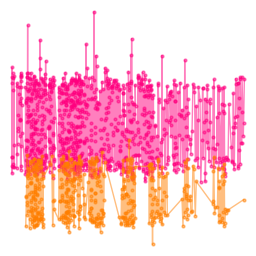

In [15]:
image = create_overlay_images(group, config, dataset_config, name_dataset)
image

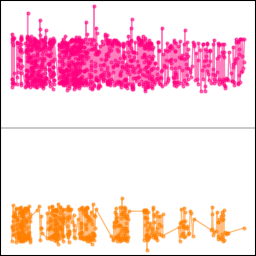

In [16]:
image = create_2grid_images(group, config, dataset_config)
image